# Esame di Metodi Numerici del 7 Maggio 2025

## Ore 14

## Esercizio 1


 Nel file ````test_7_maggio_2025.mat```` sono memorizzati  le matrici di due sistemi lineari:
 
    A  x = b 

    A1 x1 = b1
 
 dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.

 - Verificare che per risolvere ciascuno dei due sistemi sia possibile utilizzare i due metodi di discesa (visti a lezione) ed il metodo di Gauss-Seidel, richiamando i risultati teorici opportuni.
 **Punti 1**
 - implementare i tre  algoritmi e  dire quante iterazioni richiede ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 7**
 - Analizzare l'indice di condizionamento delle due matrici e richiamare teoricamente cosa questo implica in termini della velocità di convergenza  dei tre metodi alla soluzione, richiamando i risultati teorici visti a lezione.**Punti 3**


**Punti totali 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_7_maggio_2025')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


ANALISI DELLE MATRICI E CONDIZIONI DI CONVERGENZA

=== Analisi matrice A ===
Simmetrica: True
Definita positiva: True
Dominanza diagonale: False

=== Analisi matrice A1 ===
Simmetrica: True
Definita positiva: True
Dominanza diagonale: False

=== NUMERI DI CONDIZIONAMENTO ===
Condizionamento matrice A: 5.00e+02
Condizionamento matrice A1: 1.00e+01

Sistema 1 (A x = b)
----------------------------------------
Gradiente Coniugato: 118 iterazioni, errore finale: 9.49e-07
Gradiente: 1715 iterazioni, errore finale: 9.98e-07
raggio spettrale Gauss-Seidel: 0.9749675725307501
Gauss-Seidel: 319 iterazioni, errore finale: 9.77e-07


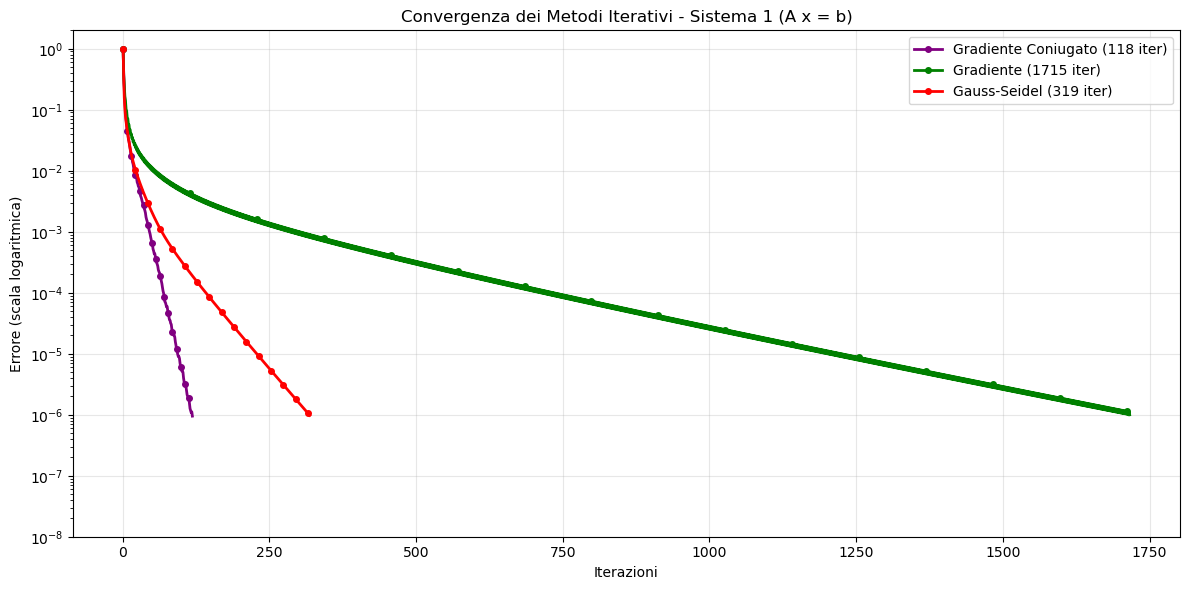


🏆 CLASSIFICA VELOCITÀ Sistema 1 (A x = b):
1° Gradiente Coniugato: 118 iterazioni
2° Gauss-Seidel: 319 iterazioni
3° Gradiente: 1715 iterazioni

Sistema 2 (A1 x1 = b1)
----------------------------------------
Gradiente Coniugato: 21 iterazioni, errore finale: 7.51e-07
Gradiente: 55 iterazioni, errore finale: 7.66e-07
raggio spettrale Gauss-Seidel: 0.5940256722011061
Gauss-Seidel: 21 iterazioni, errore finale: 6.21e-07


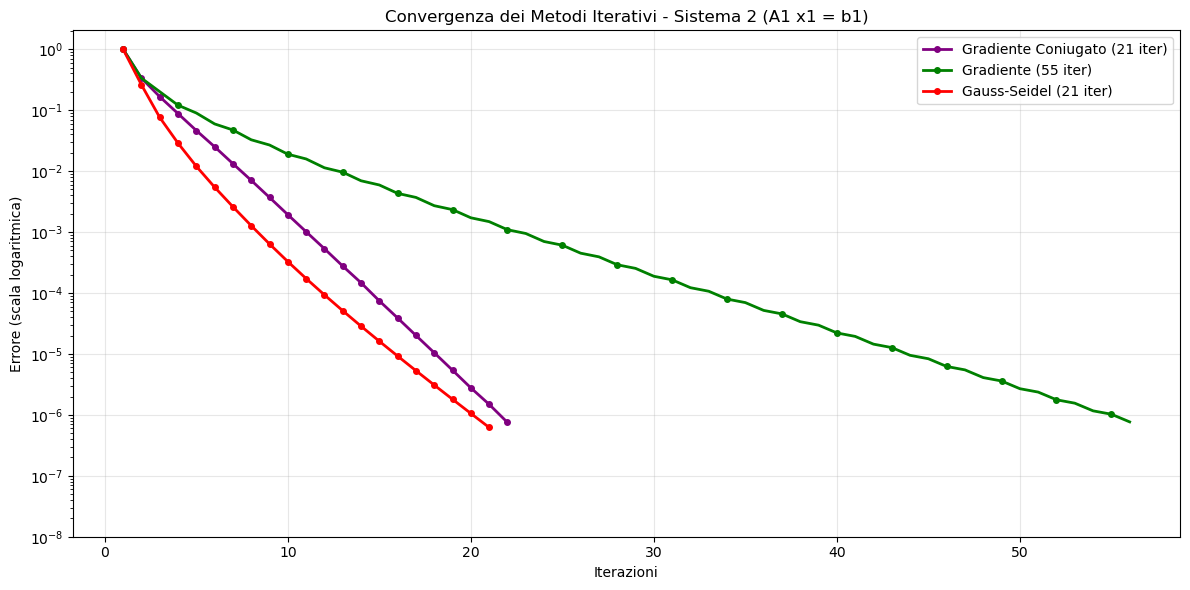


🏆 CLASSIFICA VELOCITÀ Sistema 2 (A1 x1 = b1):
1° Gradiente Coniugato: 21 iterazioni
2° Gauss-Seidel: 21 iterazioni
3° Gradiente: 55 iterazioni


In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

# Load data
dati = loadmat('test_7_maggio_2025')
A = dati["A"].astype(float)
b = dati["b"].astype(float)
A1 = dati["A1"].astype(float)
b1 = dati["b1"].astype(float)

def gauss_seidel(A, b, x0, toll=1e-6, it_max=2000):
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, -1)  # Lower triangular
    F = np.triu(A, 1)   # Upper triangular
    M = D + E
    N = -F
    T = np.linalg.inv(M) @ N
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel:", raggiospettrale)
    
    it = 0
    er_vet = []
    x = x0.copy()
    
    while errore > toll and it < it_max:
        temp = b - F @ x
        x_new = np.linalg.solve(M, temp)
        errore = np.linalg.norm(x_new - x) / np.linalg.norm(x_new)
        er_vet.append(errore)
        x = x_new.copy()
        it = it + 1
 
    return x, it, er_vet

def steepest_descent(A, b, x0, toll=1e-6, max_it=2000):
    n, m = A.shape
    if n != m:
        return None, -1, []
    
    x = x0.copy()
    r = A @ x - b
    p = -r
    it = 0
    nb = np.linalg.norm(b)
    if nb == 0:
        nb = 1
    
    error = np.linalg.norm(r) / nb
    er_vet = [error]
    
    while error > toll and it < max_it:
        it += 1
        Ap = A @ p
        
        # Fix dimension issues by ensuring scalar operations
        r_flat = r.flatten()
        p_flat = p.flatten()
        Ap_flat = Ap.flatten()
        
        alpha = -np.dot(r_flat, p_flat) / np.dot(p_flat, Ap_flat)
        x = x + alpha * p
        r = r + alpha * Ap
        error = np.linalg.norm(r) / nb
        er_vet.append(error)
        p = -r
    
    return x, it, er_vet

def conjugate_gradient(A, b, x0, toll=1e-6, max_it=2000):
    n, m = A.shape
    if n != m:
        return None, -1, []
    
    it = 0
    x = x0.copy()
    r = A @ x - b
    p = -r
    nb = np.linalg.norm(b)
    if nb == 0:
        nb = 1
    
    error = np.linalg.norm(r) / nb
    er_vet = [error]
    
    while error >= toll and it < max_it:
        it += 1
        Ap = A @ p
        
        # Fix: Ensure scalar values
        r_dot_p = np.dot(r.flatten(), p.flatten())  # Force scalar
        p_dot_Ap = np.dot(p.flatten(), Ap.flatten())  # Force scalar
        
        alpha = -r_dot_p / p_dot_Ap
        x = x + alpha * p
        
        r_old = r.copy()
        r = r + alpha * Ap
        
        # Fix: Ensure scalar dot products
        rtr_old = np.dot(r_old.flatten(), r_old.flatten())
        rtr_new = np.dot(r.flatten(), r.flatten())
        
        if rtr_old == 0:
            gamma = 0
        else:
            gamma = rtr_new / rtr_old
            
        error = np.linalg.norm(r) / nb
        er_vet.append(error)
        p = -r + gamma * p
    
    return x, it, er_vet

def check_diag_dom(A):
    n = A.shape[0]
    for i in range(n):
        diag = abs(A[i,i])
        off_diag_sum = sum(abs(A[i,j]) for j in range(n) if j != i)
        if diag <= off_diag_sum:
            return False
    return True

def check_matrix(A, matrixName):
    print(f"\n=== Analisi matrice {matrixName} ===")
    
    is_sym = np.allclose(A, A.T)
    print(f"Simmetrica: {is_sym}")
    
    is_pos = False
    if is_sym:
        eigenValues = np.linalg.eigvals(A)
        is_pos = np.all(eigenValues > 0)
        print(f"Definita positiva: {is_pos}")
    
    dom_diag = check_diag_dom(A)
    print(f"Dominanza diagonale: {dom_diag}")
    
    return is_sym, is_pos, dom_diag

print("="*60)
print("ANALISI DELLE MATRICI E CONDIZIONI DI CONVERGENZA")
print("="*60)

res_A = check_matrix(A, "A")
res_A1 = check_matrix(A1, "A1")

cond_A = np.linalg.cond(A)
cond_A1 = np.linalg.cond(A1)

print(f"\n=== NUMERI DI CONDIZIONAMENTO ===")
print(f"Condizionamento matrice A: {cond_A:.2e}")
print(f"Condizionamento matrice A1: {cond_A1:.2e}")

# Test both systems
sistemi = [
    (A, b, "Sistema 1 (A x = b)"),
    (A1, b1, "Sistema 2 (A1 x1 = b1)")
]

for idx, (matrix, rhs, nome_sistema) in enumerate(sistemi):
    print(f"\n{nome_sistema}")
    print("-" * 40)
    
    n_curr = matrix.shape[0]
    x0_curr = np.zeros((n_curr, 1))
    
    risultati_curr = {}
    
    is_sym = np.allclose(matrix, matrix.T)
    is_pos = False
    if is_sym:
        eigenvals = np.linalg.eigvals(matrix)
        is_pos = np.all(eigenvals > 0)
    
    soluzioni = {}
    
    if is_sym and is_pos:
        # Conjugate Gradient
        try:
            soluzione, iterazioni, errori = conjugate_gradient(matrix, rhs, x0_curr)
            print(f"Gradiente Coniugato: {iterazioni} iterazioni, errore finale: {errori[-1]:.2e}")
            risultati_curr['Gradiente Coniugato'] = (iterazioni, errori)
            soluzioni['Gradiente Coniugato'] = soluzione
        except Exception as e:
            print(f"Gradiente Coniugato: ERRORE - {e}")
        
        # Steepest Descent
        try:
            soluzione, iterazioni, errori = steepest_descent(matrix, rhs, x0_curr)
            print(f"Gradiente: {iterazioni} iterazioni, errore finale: {errori[-1]:.2e}")
            risultati_curr['Gradiente'] = (iterazioni, errori)
            soluzioni['Gradiente'] = soluzione
        except Exception as e:
            print(f"Gradiente: ERRORE - {e}")
    else:
        print("Metodi del gradiente: NON APPLICABILI (matrice non simmetrica definita positiva)")
    
    # Gauss-Seidel
    try:
        soluzione, iterazioni, errori = gauss_seidel(matrix, rhs, x0_curr)
        print(f"Gauss-Seidel: {iterazioni} iterazioni, errore finale: {errori[-1]:.2e}")
        risultati_curr['Gauss-Seidel'] = (iterazioni, errori)
        soluzioni['Gauss-Seidel'] = soluzione
    except Exception as e:
        print(f"Gauss-Seidel: ERRORE - {e}")
        
    if risultati_curr:
        plt.figure(figsize=(12, 6))
        
        colors = {
            'Gradiente Coniugato': 'purple',
            'Gradiente': 'green', 
            'Gauss-Seidel': 'red'
        }
        
        for metodo, (iter_count, errori) in risultati_curr.items():
            plt.semilogy(range(1, len(errori)+1), errori,
                        color=colors[metodo],
                        label=f"{metodo} ({iter_count} iter)",
                        linewidth=2,
                        marker='o',
                        markersize=4,
                        markevery=max(1, len(errori)//15))
        
        plt.xlabel('Iterazioni')
        plt.ylabel('Errore (scala logaritmica)')
        plt.title(f'Convergenza dei Metodi Iterativi - {nome_sistema}')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.ylim(bottom=1e-8)
        plt.tight_layout()
        plt.show()
        
        # Speed ranking
        print(f"\n🏆 CLASSIFICA VELOCITÀ {nome_sistema}:")
        metodi_ordinati = sorted(risultati_curr.items(), key=lambda x: x[1][0])
        for i, (metodo, (iter_count, _)) in enumerate(metodi_ordinati, 1):
            print(f"{i}° {metodo}: {iter_count} iterazioni")

## Esercizio  2

**Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,3$ con**
$$
\begin{array}{c}
x_1=1, \quad x_2=4, \quad x_3=0, \\
y_1=1, \quad y_2=0, \quad y_3=4 .
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisce il sistema lineare  ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i tre punti assegnati, e si denotino con ${\bf M}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 3**]

- si calcola la soluzione del sistema lineare ${\bf M}{\bf a}={\bf b}$ usando il metodo di fattorizzazione adatto alle caratteristiche della matrice $M$[**punti 2**]

- dopo averne determinato centro e raggio (vedi sotto formula), si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ (dove i coefficienti $a_i$ rappresentano la soluzione del sistema lineare del punto precedente) e i tre punti assegnati dal problema.[**punti 1**]
- Abbiamo costruito la circonferenza  ................... i punti del piano
  [**punti 1**] 
  (completare al posto dei puntini)



Determinante di M: 8.000000

Centro: (3.500, 3.500)
Raggio: 3.536


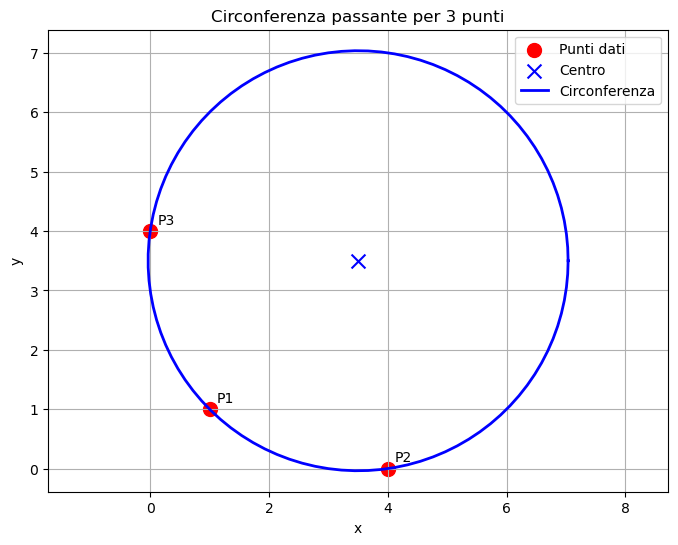

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Punti assegnati
x = np.array([1, 4, 0])
y = np.array([1, 0, 4])

M = np.column_stack([x, y, np.ones(3)])
b = -(x**2 + y**2)

# Risoluzione sistema lineare
det_M = np.linalg.det(M)
print(f"\nDeterminante di M: {det_M:.6f}")

if abs(det_M) > 1e-12:
    from scipy.linalg import lu_solve, lu_factor
    lu, piv = lu_factor(M)
    a_solution = lu_solve((lu, piv), b)

a1, a2, a3 = a_solution
centro_x = -a1/2
centro_y = -a2/2
raggio_quadrato = a1**2/4 + a2**2/4 - a3

raggio = np.sqrt(raggio_quadrato)
print(f"\nCentro: ({centro_x:.3f}, {centro_y:.3f})")
print(f"Raggio: {raggio:.3f}")


plt.figure(figsize=(8, 6))

plt.scatter(x, y, color='red', s=100, label='Punti dati')
for i in range(3):
    plt.annotate(f'P{i+1}', (x[i], y[i]), xytext=(5, 5), textcoords='offset points')

plt.scatter(centro_x, centro_y, color='blue', s=100, marker='x', label='Centro')

# Circonferenza
t = np.linspace(0, 2*np.pi, 100)
x_circle = centro_x + raggio * np.cos(t)
y_circle = centro_y + raggio * np.sin(t)
plt.plot(x_circle, y_circle, 'blue', linewidth=2, label='Circonferenza')

plt.grid(True)
plt.axis('equal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Circonferenza passante per 3 punti')
plt.show()


**Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con**
$$
\begin{array}{c}
x_1=1, \quad x_2=4, \quad x_3=0, \quad x_4=5 \\
y_1=1, \quad y_2=0, \quad y_3=4  \quad y_4=6.
\end{array}
$$ 
Scrivere lo script Python  in cui
- si costruisce il sistema lineare sovradeterminanto ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf c}$ la matrice dei coefficienti e il termine noto ottenuti;   [**punti 1**]

- si sfrutti la decomposizione QR  della matrice A  per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf c}\|_2^2$  e  si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf c}\|_2^2$;   [**punti 5**]

-  dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema.[**punti 1**]
-  
**Nota Bene**: Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$


**Punti totali 14**


Centro: (3.257, 3.252)
Raggio: 3.281


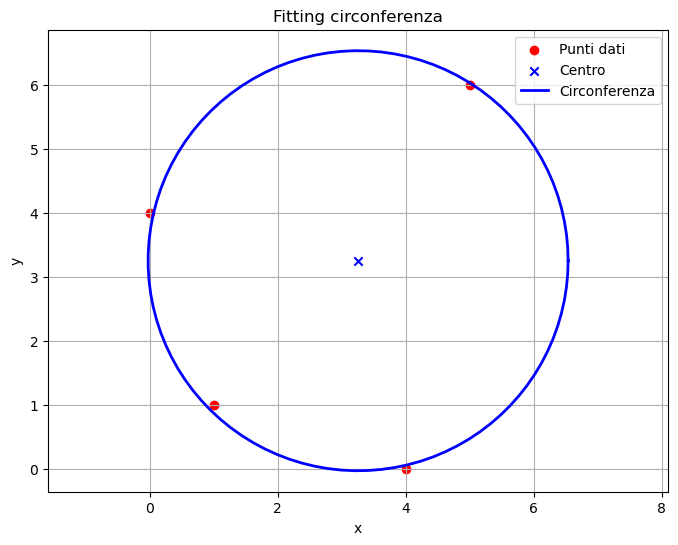

In [106]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 4, 0, 5])
y = np.array([1, 0, 4, 6])

A = np.column_stack([x, y, np.ones(4)])
c = -(x**2 + y**2)

# 2. Decomposizione QR e risoluzione minimi quadrati
Q, R = np.linalg.qr(A)
a_star = np.linalg.solve(R, Q.T @ c)


# Calcolo errore quadratico
errore_quadratico = np.linalg.norm(A @ a_star - c)**2

# Centro e raggio della circonferenza
a1, a2, a3 = a_star
centro_x = -a1/2
centro_y = -a2/2
raggio = np.sqrt(a1**2/4 + a2**2/4 - a3)

print(f"\nCentro: ({centro_x:.3f}, {centro_y:.3f})")
print(f"Raggio: {raggio:.3f}")

# 4. Visualizzazione
plt.figure(figsize=(8, 6))

# Punti originali
plt.scatter(x, y, color='red', label='Punti dati')

# Centro
plt.scatter(centro_x, centro_y, color='blue', marker='x', label='Centro')

# Circonferenza
t = np.linspace(0, 2*np.pi, 100)
x_circle = centro_x + raggio * np.cos(t)
y_circle = centro_y + raggio * np.sin(t)
plt.plot(x_circle, y_circle, 'blue', linewidth=2, label='Circonferenza')

plt.grid(True)
plt.axis('equal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting circonferenza')
plt.show()

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

**1** 
Quale delle seguenti affermazioni è FALSA riguardo alle reti MLP (Multilayer Perceptron)?

- Le reti MLP sono composte da uno o più strati nascosti di neuroni.
- Le reti MLP utilizzano una funzione di attivazione non lineare per introdurre una non linearità nel modello.

- Le reti MLP sono in grado di apprendere solo relazioni lineari tra i dati di input e output.

- Le reti MLP possono essere utilizzate per risolvere una vasta gamma di problemi di apprendimento automatico, tra cui la classificazione e la regressione.


**2.**  Quale delle seguenti affermazioni è la definizione CORRETTA di learning rate nel training di una rete neurale?

A) Il numero di volte in cui l'intero set di dati viene utilizzato durante il training.

B) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

C) Il numero di neuroni presenti nello strato di output della rete.

D) La funzione di attivazione utilizzata dai neuroni della rete


3- Quale delle seguenti affermazioni è vera riguardo ai layer convoluzionali in una rete CNN?

(a) I layer convoluzionali applicano una funzione di attivazione a ciascun elemento della feature map in ingresso.

(b) I layer convoluzionali eseguono una convoluzione tra i filtri convoluzionali e la feature map in ingresso, producendo una nuova feature map.

(c) I layer convoluzionali riducono la dimensione spaziale della feature map in ingresso.

(d) I layer convoluzionali aumentano la dimensione spaziale della feature map in ingresso.

**4.**  
Quale tra le seguenti affermazioni descrive   il compito della funzione di attivazione nel training di una rete neurale?

- Trasformare i dati di input in un formato compatibile con la rete neurale

- Introdurre una non linearità nel flusso di informazioni della rete

- Calcolare l'errore tra l'output previsto e quello effettivo

- Aggiornare i pesi delle connessioni tra i neuroni softmax


**5.** Quale tra le seguenti affermazioni è FALSA riguardo alla suddivisione del dataset in un contesto di machine learning?

- La suddivisione del dataset in set di training, validation e test è fondamentale per valutare correttamente le prestazioni di un modello di machine learning.
- Il set di training viene utilizzato per addestrare il modello sui dati.
- Il set di validation viene utilizzato per trovare le etichette dei dati di input
- Il set di test viene utilizzato per valutare le prestazioni finali del modello su dati che non sono stati utilizzati per il training o la validation

# Domande aperte

**6. Descrivi in cosa consiste la fase di forward-propagation e back-propagation nell'ambito del training di una rete neurale, soffermandoti sull'importanza dell'algoritmo di backpropagation** per il calcolo delle derivate parziali della funzione costo rispetto ai pesi di tutti i layer **[punti 1.5]**

**7** Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 3]**